# Import Nessesory Libries

In [1]:
# import all the nessecery libries for machine learning project
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Sets

In [2]:
# Import data set
outlet_data=pd.read_csv('Data Storn - Semi final data sets/outlets_data.csv')
freezer_data=pd.read_csv('Data Storn - Semi final data sets/freezer_data.csv')
product_data=pd.read_csv('Data Storn - Semi final data sets/product_data.csv')
sales_data=pd.read_csv('Data Storn - Semi final data sets/sales_data.csv')
week_data=pd.read_csv('Data Storn - Semi final data sets/week_data.csv')
duplicates_predicted=pd.read_csv('duplicates_predicted.csv')



In [3]:
# # create a data frame for each outlate and product
# outlet_data = outlet_data.groupby(['Outlet_ID'])['area(sqft)'].mean().reset_index()

#  remove both rows wich hav eduplicated values for outlet id

outlet_data = outlet_data.drop_duplicates(subset=['Outlet_ID'], keep=False)


In [4]:
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [5]:
# concatanate duplicates_predicted in to outlet_data
# duplicate predicted are values we got fro the duplicated outlate data by predicting the correct one out of those duplicate using another machine learning modelon other .ipynb file
outlet_data=pd.concat([outlet_data,duplicates_predicted[['Outlet_ID','area(sqft)']]],axis=0)

In [6]:
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
32,ID9465,6650
33,ID9541,5468
34,ID9672,7165
35,ID9841,2179


In [7]:
# Check for duplicates in column 'A'
duplicates = outlet_data[outlet_data.duplicated(['Outlet_ID'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Outlet_ID, area(sqft)]
Index: []


In [8]:
# get count of null values in each column
null_counts = outlet_data.isnull().sum()
# print the counts
print(null_counts)

Outlet_ID     0
area(sqft)    0
dtype: int64


In [9]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [10]:
sales_data

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0
...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0


In [11]:
# get count of null values in each column
null_counts = sales_data.isnull().sum()
# print the counts
print(null_counts)

Outlet_ID       0
week            0
pid             0
product_name    0
no_units        0
dtype: int64


In [12]:
week_data

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023
5,Week 6,2/6/2023,2/12/2023
6,Week 7,2/13/2023,2/19/2023
7,Week 8,2/20/2023,2/26/2023
8,Week 9,2/27/2023,3/5/2023
9,Week 10,3/6/2023,3/12/2023


In [13]:
# get count of null values in each column
null_counts = week_data.isnull().sum()
# print the counts
print(null_counts)

Week          0
Start Date    0
End Date      0
dtype: int64


# Creating Dtaframes

#### create a data frame for each outlate and product

In [14]:
# create a data frame for each outlate and product
sales_grouped_outlats = sales_data.groupby(['Outlet_ID', 'pid'])['no_units'].sum().reset_index()


In [15]:
sales_grouped_outlats

,Outlet_ID,pid,no_units
0,ID1008,IP1,6970.0
1,ID1008,IP2,7206.0
2,ID1008,IP3,6285.0
3,ID1008,IP4,6486.0
4,ID1008,IP5,6055.0
...,...,...,...
7185,ID9980,IP1,6212.0
7186,ID9980,IP2,7888.0
7187,ID9980,IP3,4999.0
7188,ID9980,IP4,9370.0


In [16]:
# pivot the dataframe to make item_description values as columns
pivoted_df_sales = sales_grouped_outlats.pivot(index='Outlet_ID', columns='pid', values='no_units')

# fill NaN values with 0
pivoted_df_sales.fillna(0, inplace=True)

# resetting the index
pivoted_df_sales = pivoted_df_sales.reset_index()

In [17]:
pivoted_df_sales

pid,Outlet_ID,BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID1008,0.0,0.0,0.0,0.0,0.0,6970.0,7206.0,6285.0,6486.0,6055.0
1,ID1012,636.0,713.0,795.0,572.0,559.0,0.0,0.0,0.0,0.0,0.0
2,ID1024,1703.0,1251.0,1150.0,1388.0,1451.0,0.0,0.0,0.0,0.0,0.0
3,ID1029,1659.0,2190.0,1891.0,1513.0,1109.0,9166.0,7577.0,9158.0,7961.0,6918.0
4,ID1036,567.0,583.0,725.0,564.0,722.0,4934.0,5708.0,6200.0,5526.0,5835.0
...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,1815.0,1878.0,1359.0,1958.0,2257.0,7142.0,6123.0,8809.0,5699.0,11328.0
947,ID9971,0.0,0.0,0.0,0.0,0.0,6390.0,6784.0,7786.0,9162.0,6361.0
948,ID9973,1411.0,1970.0,2001.0,1317.0,1870.0,7341.0,6473.0,8091.0,9850.0,7744.0
949,ID9979,0.0,0.0,0.0,0.0,0.0,5596.0,7372.0,6283.0,5740.0,6901.0


In [18]:
# add columns for each product to the outlet data frame

sales_grouped_outlats=(pd.merge(outlet_data, pivoted_df_sales, on='Outlet_ID', how='left'))

In [19]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID7203,5660,0.0,0.0,0.0,0.0,0.0,6361.0,7295.0,9127.0,5520.0,6443.0
1,ID1878,4138,0.0,0.0,0.0,0.0,0.0,7860.0,6622.0,6856.0,7954.0,6748.0
2,ID1740,5546,0.0,0.0,0.0,0.0,0.0,7625.0,8116.0,7837.0,7192.0,6817.0
3,ID4366,5134,0.0,0.0,0.0,0.0,0.0,6530.0,6259.0,9232.0,8759.0,9524.0
4,ID8358,4100,0.0,0.0,0.0,0.0,0.0,7057.0,9562.0,7652.0,6241.0,8866.0
...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376.0,2856.0,2366.0,2521.0,2130.0,9851.0,11156.0,7233.0,9251.0,10886.0
947,ID9541,5468,2426.0,2778.0,2163.0,2618.0,2732.0,12116.0,12839.0,14171.0,11826.0,11838.0
948,ID9672,7165,2873.0,3212.0,3686.0,2872.0,3334.0,10869.0,11337.0,11152.0,10102.0,8780.0
949,ID9841,2179,1216.0,1526.0,1270.0,1294.0,1218.0,5702.0,5368.0,5557.0,4374.0,4834.0


#### creating fetures for total item solds for bulk and impuls item

In [20]:
sales_grouped_outlats['tot_bulk_itm'] = sales_grouped_outlats[['BP1', 'BP2', 'BP3', 'BP4', 'BP5']].sum(axis=1)
sales_grouped_outlats['tot_impulse_itm'] = sales_grouped_outlats[['IP1', 'IP2', 'IP3', 'IP4', 'IP5']].sum(axis=1)

In [21]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm
0,ID7203,5660,0.0,0.0,0.0,0.0,0.0,6361.0,7295.0,9127.0,5520.0,6443.0,0.0,34746.0
1,ID1878,4138,0.0,0.0,0.0,0.0,0.0,7860.0,6622.0,6856.0,7954.0,6748.0,0.0,36040.0
2,ID1740,5546,0.0,0.0,0.0,0.0,0.0,7625.0,8116.0,7837.0,7192.0,6817.0,0.0,37587.0
3,ID4366,5134,0.0,0.0,0.0,0.0,0.0,6530.0,6259.0,9232.0,8759.0,9524.0,0.0,40304.0
4,ID8358,4100,0.0,0.0,0.0,0.0,0.0,7057.0,9562.0,7652.0,6241.0,8866.0,0.0,39378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376.0,2856.0,2366.0,2521.0,2130.0,9851.0,11156.0,7233.0,9251.0,10886.0,12249.0,48377.0
947,ID9541,5468,2426.0,2778.0,2163.0,2618.0,2732.0,12116.0,12839.0,14171.0,11826.0,11838.0,12717.0,62790.0
948,ID9672,7165,2873.0,3212.0,3686.0,2872.0,3334.0,10869.0,11337.0,11152.0,10102.0,8780.0,15977.0,52240.0
949,ID9841,2179,1216.0,1526.0,1270.0,1294.0,1218.0,5702.0,5368.0,5557.0,4374.0,4834.0,6524.0,25835.0


#### Creatng feature for Total Icecream Volume sold

In [22]:
sales_grouped_outlats['tot_icecream_vol']=(sales_grouped_outlats['tot_bulk_itm']*1.0)+(sales_grouped_outlats['tot_impulse_itm']*0.2)

In [23]:
sales_grouped_outlats[['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm']] = sales_grouped_outlats[['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm']].astype(int)

In [24]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4
947,ID9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0
948,ID9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0
949,ID9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0


#### Create a feature for total revenew

In [25]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [26]:
sales_grouped_outlats['tot_revnew']=((sales_grouped_outlats['BP1']*1200)+(sales_grouped_outlats['BP2']*1100)+(sales_grouped_outlats['BP3']*1150)+(sales_grouped_outlats['BP4']*1000)+(sales_grouped_outlats['BP5']*1100)+(sales_grouped_outlats['IP1']*100)+(sales_grouped_outlats['IP2']*90)+(sales_grouped_outlats['IP3']*110)+(sales_grouped_outlats['IP4']*100)+(sales_grouped_outlats['IP5']*100)).astype(float)

In [27]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0
947,ID9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0
948,ID9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0
949,ID9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0


#### Features for multiplication of all the bulk value and all the Impuls value

In [28]:
# sales_grouped_outlats['bulk_multi']=sales_grouped_outlats.apply(lambda row: row['BP1'] * row['BP2'] * row['BP3'] * row['BP4'] * row['BP5'], axis=1)
# sales_grouped_outlats['impuls_multi']=sales_grouped_outlats.apply(lambda row: row['IP1'] * row['IP2'] * row['IP3'] * row['IP4'] * row['IP5'], axis=1)

In [29]:
# sales_grouped_outlats

#### Weekly sales

In [30]:
sales_data=sales_data.merge(product_data[['pid','price']], on='pid', how='left')



In [31]:
sales_data

,Outlet_ID,week,pid,product_name,no_units,price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,100
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,90
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,110
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,100
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,100
...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1200
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1100
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1150
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1000


In [32]:
weekly_sales=sales_data.groupby(['Outlet_ID', 'week'])['price'].sum().reset_index()
weekly_avg_sales=weekly_sales.groupby(['Outlet_ID'])['price'].mean().reset_index().round(2)

In [33]:
# rename a column in weekly_avg_sales   
weekly_avg_sales.rename(columns = {'price':'avg_weekly_sales'}, inplace = True)
sales_grouped_outlats=sales_grouped_outlats.merge(weekly_avg_sales[['Outlet_ID','avg_weekly_sales']], on='Outlet_ID', how='left')

In [34]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0,442.50
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0,455.83
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0,467.50
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0,441.67
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0,466.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0,10490.83
947,ID9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0,10925.00
948,ID9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0,10846.67
949,ID9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0,10434.17


#### Weekly Avg Volume

In [35]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [36]:
sales_data=sales_data.merge(product_data[['pid','volume']], on='pid', how='left')


In [37]:
sales_data

,Outlet_ID,week,pid,product_name,no_units,price,volume
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,100,0.2
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,90,0.2
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,110,0.2
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,100,0.2
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,100,0.2
...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1200,1.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1100,1.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1150,1.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1000,1.0


In [38]:
weekly_vol=sales_data.groupby(['Outlet_ID', 'week'])['volume'].sum().reset_index()
weekly_avg_volume=weekly_vol.groupby(['Outlet_ID'])['volume'].mean().reset_index().round(2)

In [39]:
# rename a column in weekly_avg_sales   
weekly_avg_volume.rename(columns = {'volume':'avg_weekly_volume'}, inplace = True)
sales_grouped_outlats=sales_grouped_outlats.merge(weekly_avg_volume[['Outlet_ID','avg_weekly_volume']], on='Outlet_ID', how='left')

In [40]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0,442.50,0.88
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0,455.83,0.92
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0,467.50,0.93
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0,441.67,0.88
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0,466.67,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0,10490.83,9.97
947,ID9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0,10925.00,10.78
948,ID9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0,10846.67,10.28
949,ID9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0,10434.17,9.88


## Encode

In [41]:
sales_grouped_outlats['Outlet_ID'] = sales_grouped_outlats['Outlet_ID'].str.replace(r'^ID', '').astype(int)

C:\Users\gw\AppData\Local\Temp\ipykernel_21984\777021382.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sales_grouped_outlats['Outlet_ID'] = sales_grouped_outlats['Outlet_ID'].str.replace(r'^ID', '').astype(int)


In [42]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume
0,7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0,442.50,0.88
1,1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0,455.83,0.92
2,1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0,467.50,0.93
3,4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0,441.67,0.88
4,8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0,466.67,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0,10490.83,9.97
947,9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0,10925.00,10.78
948,9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0,10846.67,10.28
949,9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0,10434.17,9.88


## Normalization

In [43]:
sales_grouped_outlats_before_normalize=sales_grouped_outlats.copy()

In [44]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


feature_list=['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm','tot_icecream_vol','tot_revnew','avg_weekly_sales']

# RobustScaler normalization
rs = RobustScaler()
sales_grouped_outlats[feature_list] = rs.fit_transform(sales_grouped_outlats[feature_list])

# # z-score normalization
# sales_grouped_outlats[feature_list] = (sales_grouped_outlats[feature_list] - sales_grouped_outlats[feature_list].mean()) / sales_grouped_outlats[feature_list].std()

# # StandardScaler normalization
# ss = StandardScaler()
# sales_grouped_outlats[feature_list] = ss.fit_transform(sales_grouped_outlats[feature_list])

# # MinMaxScaler normalization
# mm = MinMaxScaler()
# sales_grouped_outlats[feature_list] = mm.fit_transform(sales_grouped_outlats[feature_list])

In [45]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume
0,7203,0.501101,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.120727,0.306623,0.639389,-0.061494,0.140455,-0.591549,0.257945,-0.076896,-0.278671,-4.015503,0.88
1,1878,0.054046,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.413557,0.172972,0.194792,0.440776,0.198739,-0.591549,0.316647,-0.051447,-0.267172,-4.004223,0.92
2,1740,0.467616,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.367650,0.469665,0.386844,0.283533,0.211924,-0.591549,0.386826,-0.021023,-0.252009,-3.994347,0.93
3,4366,0.346600,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.153741,0.100884,0.659945,0.606892,0.729218,-0.591549,0.510082,0.032410,-0.221168,-4.016206,0.88
4,8358,0.042884,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,0.256691,0.756827,0.350626,0.087288,0.603478,-0.591549,0.468074,0.014199,-0.235506,-3.995049,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9465,0.791893,1.380363,1.894923,1.401187,1.567190,1.254401,0.802500,1.073379,0.268598,0.708419,0.989490,1.592262,0.876313,1.395650,1.230162,4.487996,9.97
947,9541,0.444706,1.421617,1.826049,1.229008,1.651832,1.784331,1.244970,1.407606,1.626860,1.239785,1.171412,1.675700,1.530156,1.725122,1.432290,4.855416,10.78
948,9672,0.943163,1.790429,2.209272,2.520780,1.873473,2.314261,1.001367,1.109324,1.035826,0.884028,0.587044,2.256909,1.051557,1.838204,1.697016,4.789129,10.28
949,9841,-0.521369,0.423267,0.720530,0.471586,0.496510,0.451585,-0.008009,-0.076060,-0.059514,-0.297978,-0.167017,0.571581,-0.146302,0.389376,0.362501,4.440047,9.88


In [46]:
sales_grouped_outlats.describe()

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,5501.460568,0.091636,0.218659,0.229426,0.205854,0.196364,0.223932,-0.070606,-0.065839,-0.080809,-0.096109,-0.063356,0.264924,-0.094450,0.242719,0.181500,-0.750422,4.263764
std,2546.490239,0.707803,0.647553,0.696139,0.650867,0.665388,0.682759,0.727156,0.749965,0.745081,0.762452,0.718296,0.673587,0.818565,0.583836,0.509706,2.068635,2.203316
min,1008.000000,-1.125275,-0.580033,-0.626932,-0.605598,-0.632635,-0.620599,-1.121899,-1.142091,-1.147416,-1.200578,-1.090770,-0.591549,-1.318302,-0.504464,-0.466743,-4.051470,0.800000
25%,3381.000000,-0.463064,-0.245462,-0.223400,-0.239186,-0.246073,-0.238556,-0.529693,-0.545427,-0.567150,-0.558502,-0.566692,-0.100731,-0.471023,-0.119257,-0.264100,-0.721085,3.920000
50%,5561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,7573.500000,0.536936,0.754538,0.776600,0.760814,0.753927,0.761444,0.470307,0.454573,0.432850,0.441498,0.433308,0.899269,0.528977,0.880743,0.735900,0.278915,5.470000
max,9980.000000,1.761198,2.990924,3.649448,3.435963,3.347295,3.922535,2.302207,2.807268,2.781128,3.006191,2.447736,3.626315,2.568558,3.247797,2.892655,9.150186,15.450000


In [47]:
# Print list of features
print(sales_grouped_outlats.columns.tolist())

['Outlet_ID', 'area(sqft)', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'IP1', 'IP2', 'IP3', 'IP4', 'IP5', 'tot_bulk_itm', 'tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew', 'avg_weekly_sales', 'avg_weekly_volume']


# model to remove duploicate Outlet_ID

In [48]:
# Group the DataFrame by column 'Outlet_ID' and get the groups with duplicates
groups = sales_grouped_outlats[['Outlet_ID','area(sqft)','tot_revnew']].groupby(['Outlet_ID']).filter(lambda x: len(x) > 1)

df_of_duplicates=pd.DataFrame()

# Iterate over the groups and print the duplicate rows
for name, group in groups.groupby(['Outlet_ID']):
    df_of_duplicates=df_of_duplicates.append(group)

C:\Users\gw\AppData\Local\Temp\ipykernel_21984\4174369189.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups.groupby(['Outlet_ID']):


In [49]:
df_of_duplicates

""


# Visualization

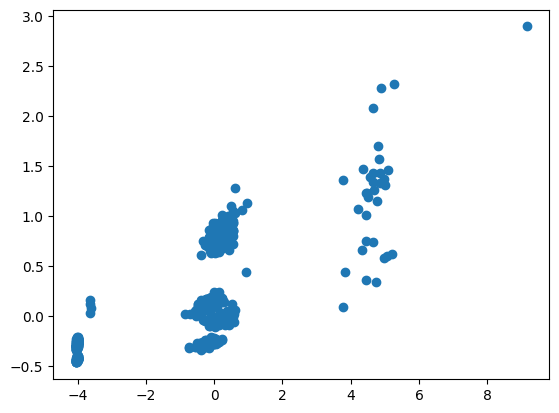

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


x = sales_grouped_outlats['avg_weekly_sales']
y = sales_grouped_outlats['tot_revnew']

plt.scatter(x, y)

plt.show()

##### Scatter Plot for all features

In [51]:
# # draw a scatter plot for detailDF every column combinations

# # Create scatter plot grid
# sns.pairplot(sales_grouped_outlats, kind="scatter")

# # Display the plot
# plt.show()

##### Corelation matrix

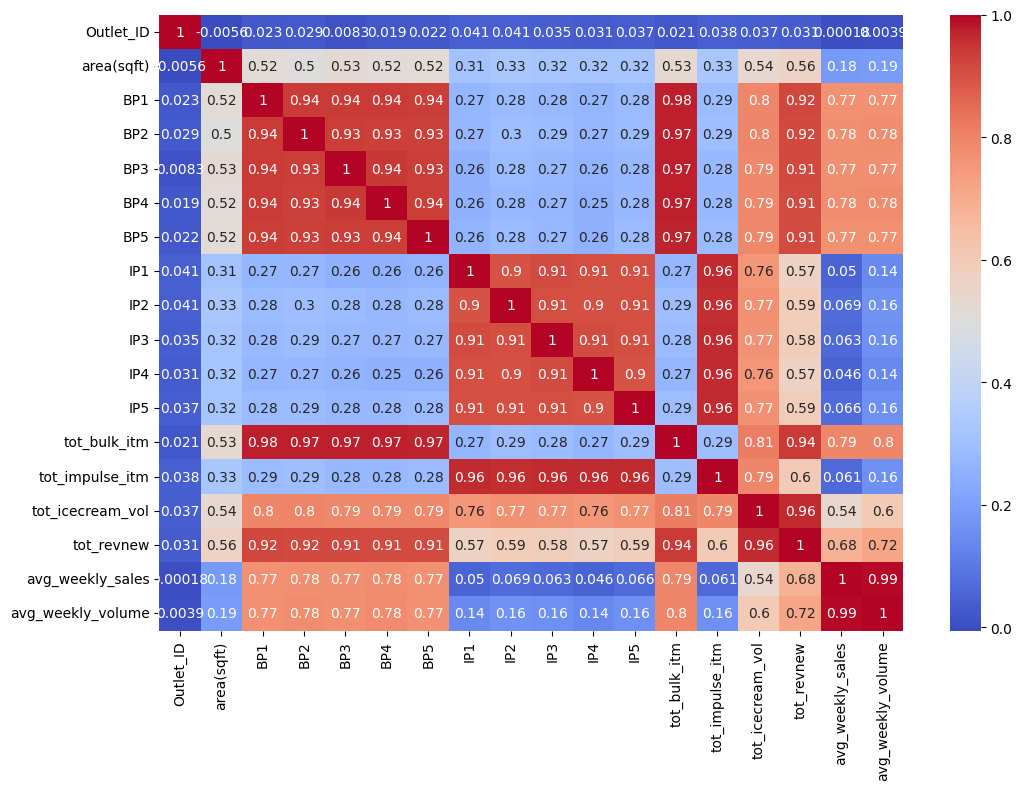

In [52]:
# Create correlation matrix
corr = sales_grouped_outlats.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

##### Dropping Highly co related Features

In [53]:
# sales_grouped_outlats=sales_grouped_outlats.drop(['BP1','BP2','BP3','BP4','BP5','IP1','IP2','IP3','IP4','IP5',],axis=1)

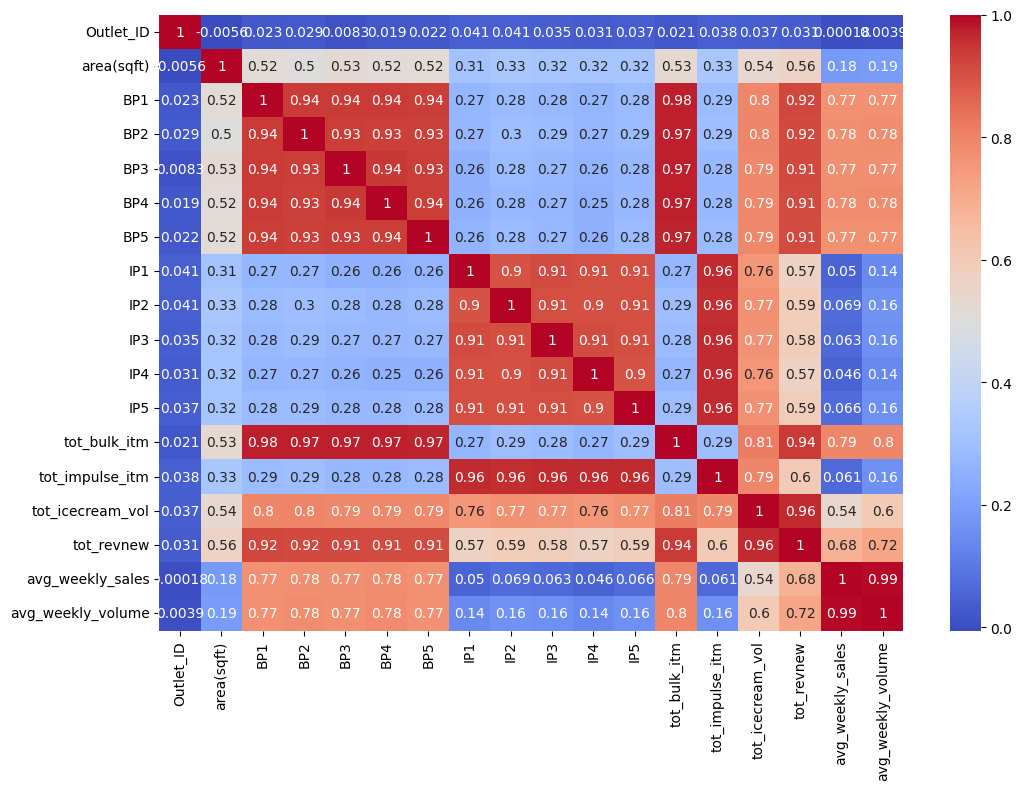

In [54]:
# Create correlation matrix
corr = sales_grouped_outlats.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

# Training the Model

## K means

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data from csv file into pandas DataFrame
data = sales_grouped_outlats

n_clusters=10
iterations=500

# Select features for k-means clustering
X = data.drop(['Outlet_ID'], axis=1)

# Initialize and fit k-means clustering model
kmeans = KMeans(n_clusters=10,init='k-means++', n_init=2000, max_iter=500,tol=0.000001 ) # set number of clusters
kmeans.fit(X)

# Get predicted cluster labels and centroids
labels = kmeans.predict(X)




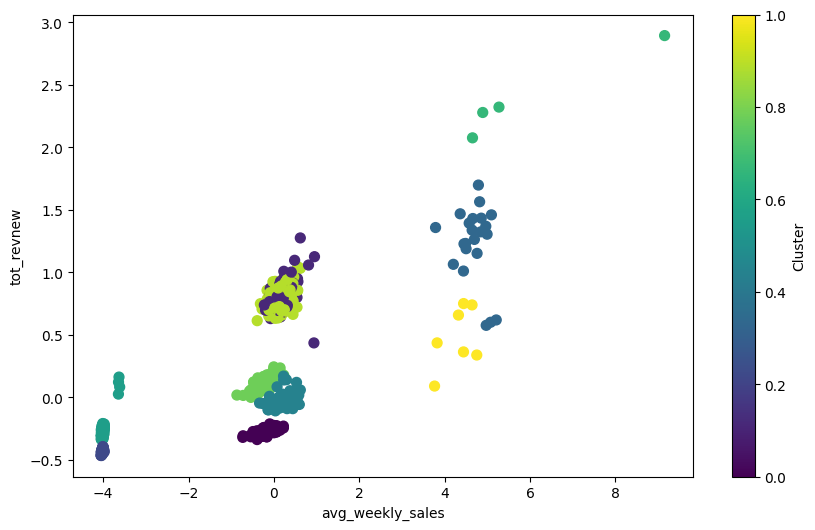

In [56]:
# Create scatter plot with feature_1 on x-axis and feature_2 on y-axis

featur_1 = 'avg_weekly_sales'
featur_2 = 'tot_revnew'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[featur_1], data[featur_2], c=labels, s=50, cmap='viridis')

# Add legend with cluster labels
scatter = ax.scatter([],[], c=[], cmap='viridis')
plt.colorbar(scatter, label='Cluster')

# Set x and y axis labels
ax.set_xlabel(featur_1)
ax.set_ylabel(featur_2)

# Show plot
plt.show()

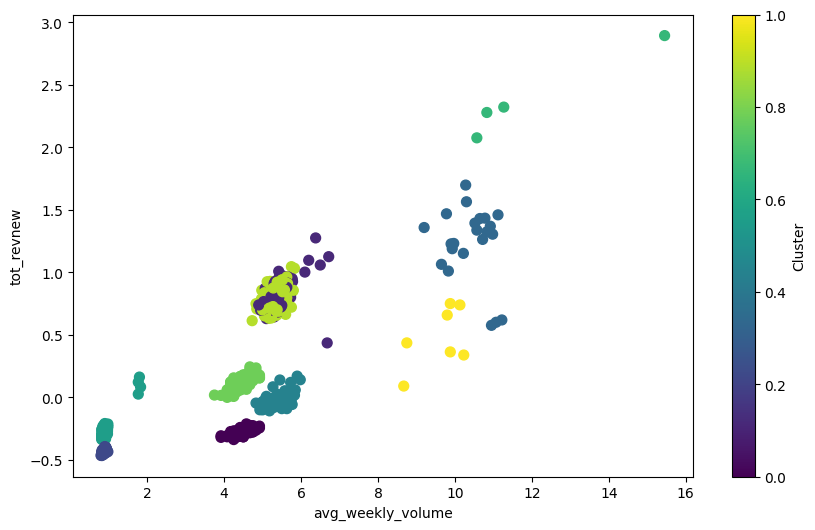

In [57]:
# Create scatter plot with feature_1 on x-axis and feature_2 on y-axis

featur_1 = 'avg_weekly_volume'
featur_2 = 'tot_revnew'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[featur_1], data[featur_2], c=labels, s=50, cmap='viridis')

# Add legend with cluster labels
scatter = ax.scatter([],[], c=[], cmap='viridis')
plt.colorbar(scatter, label='Cluster')

# Set x and y axis labels
ax.set_xlabel(featur_1)
ax.set_ylabel(featur_2)

# Show plot
plt.show()

In [58]:
# Create a DataFrame from the array of cluster lables
clusters_df = pd.DataFrame(labels, columns=['Clusters'])

In [59]:
clusters_df

,Clusters
0,5
1,5
2,5
3,5
4,5
...,...
946,3
947,3
948,3
949,9


In [60]:
cluster_sizes=clusters_df.groupby(['Clusters']).size().reset_index(name='counts')


In [80]:
cluster_sizes

,Clusters,counts
0,0,99
1,1,133
2,2,70
3,3,22
4,4,182
5,5,165
6,6,4
7,7,128
8,8,141
9,9,7


In [61]:
min_cluster_size=cluster_sizes['counts'].min()

In [62]:
outlats_with_clusters = pd.concat([sales_grouped_outlats_before_normalize, clusters_df], axis=1)
df_for_optimization=outlats_with_clusters[['Outlet_ID','area(sqft)','tot_revnew','tot_icecream_vol','Clusters']]

In [63]:
outlats_with_clusters

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew,avg_weekly_sales,avg_weekly_volume,Clusters
0,7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0,442.50,0.88,5
1,1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0,455.83,0.92,5
2,1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0,467.50,0.93,5
3,4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0,441.67,0.88,5
4,8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0,466.67,0.93,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,9465,6650,2376,2856,2366,2521,2130,9851,11156,7233,9251,10886,12249,48377,21924.4,18376170.0,10490.83,9.97,3
947,9541,5468,2426,2778,2163,2618,2732,12116,12839,14171,11826,11838,12717,62790,25275.0,20369970.0,10925.00,10.78,3
948,9672,7165,2873,3212,3686,2872,3334,10869,11337,11152,10102,8780,15977,52240,26425.0,22981250.0,10846.67,10.28,3
949,9841,2179,1216,1526,1270,1294,1218,5702,5368,5557,4374,4834,6524,25835,11691.0,9817490.0,10434.17,9.88,9


In [64]:
df_for_optimization

,Outlet_ID,area(sqft),tot_revnew,tot_icecream_vol,Clusters
0,7203,5660,3492920.0,6949.2,5
1,1878,4138,3606340.0,7208.0,5
2,1740,5546,3755910.0,7517.4,5
3,4366,5134,4060130.0,8060.8,5
4,8358,4100,3918700.0,7875.6,5
...,...,...,...,...,...
946,9465,6650,18376170.0,21924.4,3
947,9541,5468,20369970.0,25275.0,3
948,9672,7165,22981250.0,26425.0,3
949,9841,2179,9817490.0,11691.0,9


In [65]:
# # create a csv file for the optimization data frame
# df_for_optimization.to_csv('df_for_optimization.csv', index=False)

### Evaluation values for clusters

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs

# Calculate Inertia
inertia = kmeans.inertia_

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, kmeans.labels_)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, kmeans.labels_)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, kmeans.labels_)

# Print the results
print("Inertia:", inertia)
print("Silhouette Coefficient:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)


Inertia: 836.5648887332368
Silhouette Coefficient: 0.460610142724587
Davies-Bouldin Index: 1.0063811159127982
Calinski-Harabasz Index: 1835.4643286144574


In [67]:
# Inertia: low is better
# Silhouette Coefficient: 1 is better 0 is bad 78
# Davies-Bouldin Index: lower is better 
# Calinski-Harabasz Index: higher is better

# after adding weekly avg sales
    # Inertia: 774.2162655714542
    # Silhouette Coefficient: 0.4673038847496417
    # Davies-Bouldin Index: 0.9600227147976963
    # Calinski-Harabasz Index: 1369.8158782359212



# Robust scaler :
#     Inertia: 621.03687827908
#     Silhouette Coefficient: 0.44268442259602675
#     Davies-Bouldin Index: 0.9435926056629504
#     Calinski-Harabasz Index: 1049.0538033906232

# z-score scaler :
    # Inertia: 1240.607445537912
    # Silhouette Coefficient: 0.4557139413557797
    # Davies-Bouldin Index: 0.9449081998290716
    # Calinski-Harabasz Index: 1096.4018238519627
    
# StandardScaler normalization :
    # Inertia: 1241.9091416220742
    # Silhouette Coefficient: 0.45568396168834024
    # Davies-Bouldin Index: 0.9448579814654641
    # Calinski-Harabasz Index: 1096.40589163369
    
# MinMaxScaler normalization :
    # Inertia: 46.33295208716464
    # Silhouette Coefficient: 0.43591515893768984
    # Davies-Bouldin Index: 0.8959557985040695
    # Calinski-Harabasz Index: 976.159251870873

## DB scan

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load data from csv file into pandas DataFrame
data = sales_grouped_outlats

# Select features for DBSCAN clustering
X = data.drop(['Outlet_ID'], axis=1)

# Normalize data using standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize and fit DBSCAN clustering model
dbscan = DBSCAN(eps=2.5, min_samples=min_cluster_size) # set hyperparameters
dbscan.fit(X)

# Get predicted cluster labels
labels_DB = dbscan.labels_



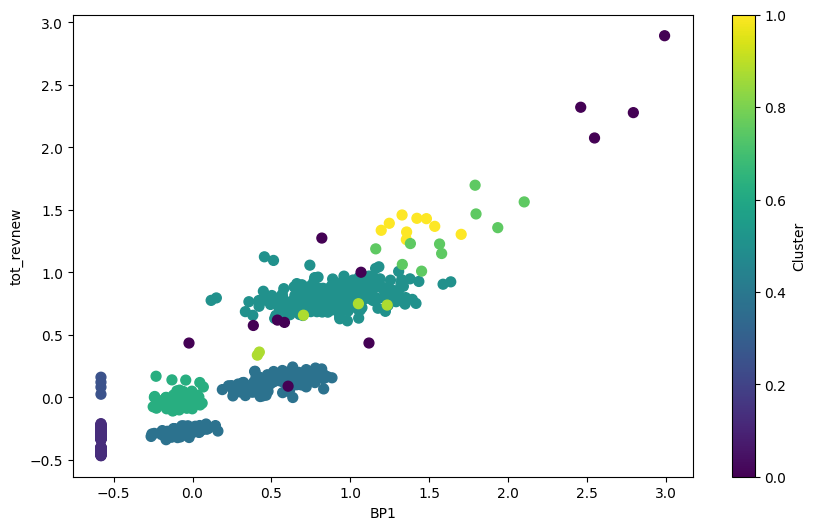

In [69]:
# Create scatter plot with feature_1 on x-axis and feature_2 on y-axis

featur_1 = 'BP1'
featur_2 = 'tot_revnew'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[featur_1], data[featur_2], c=labels_DB, s=50, cmap='viridis')

# Add legend with cluster labels
scatter = ax.scatter([],[], c=[], cmap='viridis')
plt.colorbar(scatter, label='Cluster')

# Set x and y axis labels
ax.set_xlabel(featur_1)
ax.set_ylabel(featur_2)

# Show plot
plt.show()

In [70]:
# Create a DataFrame from the array of cluster lables
clusters_df_DB = pd.DataFrame(labels_DB, columns=['Clusters'])

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs

# Calculate Inertia
# inertia = dbscan.inertia_

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, dbscan.labels_)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, dbscan.labels_)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, dbscan.labels_)

# Print the results
# print("Inertia:", inertia)
print("Silhouette Coefficient:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)


Silhouette Coefficient: 0.5443492564507524
Davies-Bouldin Index: 2.1221914725586766
Calinski-Harabasz Index: 655.9214509304372


In [72]:
# Inertia: low is better
# Silhouette Coefficient: 1 is better 0 is bad 78
# Davies-Bouldin Index: lower is better 
# Calinski-Harabasz Index: higher is better

# DB try 1

# Inertia: 838.004466765913
# Silhouette Coefficient: 0.5261628165810733
# Davies-Bouldin Index: 1.908849469919231
# Calinski-Harabasz Index: 728.2991992932272

# Inertia: 838.004466765913
# Silhouette Coefficient: 0.46109338839673375
# Davies-Bouldin Index: 0.9988008081524068
# Calinski-Harabasz Index: 1832.9985670350884

## Optix

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

# Load data from csv file into pandas DataFrame
data = sales_grouped_outlats

# Select features for OPTICS clustering
X = data.drop(['Outlet_ID'], axis=1)

# Normalize data using standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize and fit OPTICS clustering model
optics = OPTICS(min_samples=5, xi=.05, min_cluster_size=0.04)
optics.fit(X)

# Get predicted cluster labels
labels_opt = optics.labels_


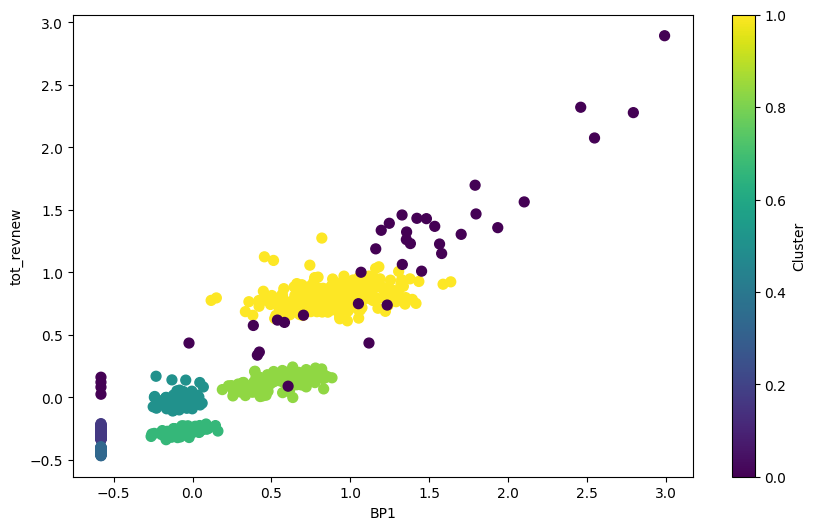

In [74]:
# Create scatter plot with feature_1 on x-axis and feature_2 on y-axis

featur_1 = 'BP1'
featur_2 = 'tot_revnew'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[featur_1], data[featur_2], c=labels_opt, s=50, cmap='viridis')

# Add legend with cluster labels
scatter = ax.scatter([],[], c=[], cmap='viridis')
plt.colorbar(scatter, label='Cluster')

# Set x and y axis labels
ax.set_xlabel(featur_1)
ax.set_ylabel(featur_2)

# Show plot
plt.show()

In [75]:
# Create a DataFrame from the array of cluster lables
clusters_df_DB_optics = pd.DataFrame(labels_opt, columns=['Clusters'])

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs

# Calculate Inertia
# inertia = optics.inertia_

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, optics.labels_)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, optics.labels_)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, optics.labels_)

# Print the results
# print("Inertia:", inertia)
print("Silhouette Coefficient:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)


Silhouette Coefficient: 0.5830148029889085
Davies-Bouldin Index: 1.0228535936904646
Calinski-Harabasz Index: 952.8484334189595


In [77]:
# Inertia: low is better
# Silhouette Coefficient: 1 is better 0 is bad 78
# Davies-Bouldin Index: lower is better 
# Calinski-Harabasz Index: higher is better

# Inertia: 836.5648887332368
# Silhouette Coefficient: 0.5522019752021113
# Davies-Bouldin Index: 1.198489214985781
# Calinski-Harabasz Index: 1044.1404219520855

In [78]:
outlats_with_clusters_optics = pd.concat([sales_grouped_outlats_before_normalize, clusters_df_DB_optics], axis=1)
df_for_optimization_optics=outlats_with_clusters_optics[['Outlet_ID','area(sqft)','tot_revnew','tot_icecream_vol','Clusters']]

In [ ]:
cluster_sizes_optics=clusters_df_DB_optics.groupby(['Clusters']).size().reset_index(name='counts')

In [79]:
# create a csv file for the optimization data frame
df_for_optimization.to_csv('df_for_optimization_optics.csv', index=False)

# Optimization

In [81]:
df_for_optimization=df_for_optimization_optics

In [82]:
df_for_optimization

,Outlet_ID,area(sqft),tot_revnew,tot_icecream_vol,Clusters
0,7203,5660,3492920.0,6949.2,0
1,1878,4138,3606340.0,7208.0,0
2,1740,5546,3755910.0,7517.4,0
3,4366,5134,4060130.0,8060.8,0
4,8358,4100,3918700.0,7875.6,0
...,...,...,...,...,...
946,9465,6650,18376170.0,21924.4,-1
947,9541,5468,20369970.0,25275.0,-1
948,9672,7165,22981250.0,26425.0,-1
949,9841,2179,9817490.0,11691.0,-1
